In [1]:
from skimage.data import lfw_subset
from skimage.io import imsave, imshow, show
import numpy as np
from tqdm import tqdm_notebook
from skimage.feature import hog
from keras.datasets import cifar100
from skimage import data, exposure
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Using TensorFlow backend.


In [2]:
people_labels_id = ['baby', 'boy', 'girl', 'man', 'woman']

In [3]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [4]:
pidx = [CIFAR100_LABELS_LIST.index(label) for label in people_labels_id]

In [5]:
baby = x_train[y_train.flatten() == 2]
boy = x_train[y_train.flatten() == 11]
girl = x_train[y_train.flatten() == 35]
man = x_train[y_train.flatten() == 46]
woman = x_train[y_train.flatten() == 98]

people_dataset = np.vstack((baby, boy, girl, man, woman))
people_labels = np.ones(people_dataset.shape[0]).reshape(-1, 1)

In [6]:
non_people_dataset = []

for label in tqdm_notebook(range(len(CIFAR100_LABELS_LIST))):
    if label not in pidx:
        label_dataset = x_train[y_train.flatten() == label][:27]
        non_people_dataset.append(label_dataset)



non_people_dataset = np.array(non_people_dataset)
sh1 = non_people_dataset.shape[0]
sh2 = non_people_dataset.shape[1]
non_people_dataset = non_people_dataset.reshape(sh1 * sh2, 32, 32, 3)
non_people_labels = np.zeros(non_people_dataset.shape[0]).reshape(-1, 1)

dataset = np.vstack((people_dataset, non_people_dataset))
labels = np.vstack((people_labels, non_people_labels))

In [75]:
im = 0.2125 * dataset[0][:, :, 0] + 0.7154 * dataset[0][:, :, 1] + 0.0721 * dataset[0][:, :, 2]
fd, hog_image = hog(im, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True, multichannel=False)

X = np.zeros((dataset.shape[0], fd.shape[0]))
fd.shape[0]

128

In [108]:
import matplotlib.pyplot as plt
from skimage.feature import hog
for i, img in tqdm_notebook(enumerate(dataset)):
    image = 0.2125 * img[:, :, 0] + 0.7154 * img[:, :, 1] + 0.0721 * img[:, :, 2]
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                        cells_per_block=(4, 4), visualize=True, multichannel=False)
    X[i] = fd

y = labels

In [109]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [111]:
model = SVC(kernel='linear', verbose=True)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

C:\Users\Boris Feldman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

0.6900296150049359

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probs = model.predict_proba(X_test)

accuracy_score(y_test, prediction), roc_auc_score(y_test, probs[:, 1])

C:\Users\Boris Feldman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Boris Feldman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.702862783810464, 0.7720379553393214)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

C:\Users\Boris Feldman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

0.7344521224086871

Explained variation per principal component: [0.07184514 0.04024936]


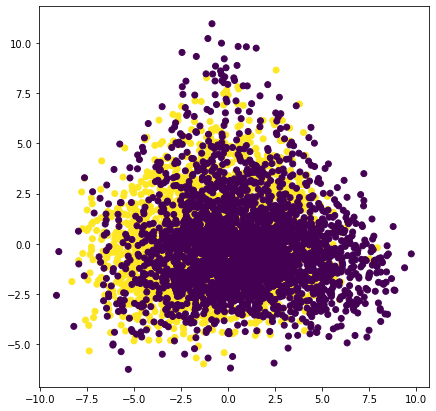

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
colors = y.flatten()
one_c = colors == 1
plt.figure(figsize=[7,7])
plt.scatter(pca_result[:,0][:], pca_result[:, 1][:], c=colors[:])
plt.show()